# Neural Network for Coupling prediction

## Data preprocessing

Importing the necessary libraries

In [1]:
import random
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.layers import Dense
from tensorflow.keras import initializers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Importing datatset as Pandas dataframe and visualizing the first 5 rows

In [2]:
data = pd.read_csv("Datasets/COMPLETE_FULLDATA.csv",sep=";", decimal='.')
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Datasets/COMPLETE_FULLDATA.csv'

Visualizing dataset dimensions

In [3]:
data.shape

(10560, 13)

Visualizing available angles

In [4]:
data['alpha_deg'].unique()

array([  0,   5,  10,  15,  30,  45,  60,  70,  80,  90, 100, 110, 120,
       150, 180, 210, 240, 270, 300, 330], dtype=int64)

Creating reduced dataset by removing angles

In [5]:
removed_angles = [0]
data_removed = data[~data['alpha_deg'].isin(removed_angles)]

Input features and output variable selection

In [6]:
X = data_removed[["Xshift","Yshift","Zshift","alpha_deg"]].values
Y = data_removed["CPL [eV]"].values

Splitting of the data into train set and test set

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X.astype(float) ,Y, test_size=0.2)

Scaling of input features

In [8]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## Neural Network

Building of the Neural Network architecture

In [9]:
model = Sequential()
model.add(Dense(512, input_shape=(4,), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

Configuration of the model for training

In [10]:
model.compile(loss='mse', optimizer='adam')

A brief summary of the model

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               2560      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 177,153
Trainable params: 177,153
Non-trai

Number of epochs used for training

In [12]:
num_epochs = 5000

In [13]:
checkpoint_callback = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

Neural Network training

In [14]:
history = model.fit(X_train,y_train,epochs=num_epochs,validation_split = 0.1, shuffle=False, batch_size = X_train.shape[0], callbacks=[checkpoint_callback])

Epoch 1/5000
1/1 [==============================] - 13s 13s/step - loss: 0.0015 - val_loss: 0.0079
Epoch 2/5000
1/1 [==============================] - 1s 700ms/step - loss: 0.0073 - val_loss: 0.0022
Epoch 3/5000
1/1 [==============================] - 1s 841ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 4/5000
1/1 [==============================] - 1s 769ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 5/5000
1/1 [==============================] - 1s 842ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 6/5000
1/1 [==============================] - 1s 966ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 7/5000
1/1 [==============================] - 1s 624ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 8/5000
1/1 [==============================] - 0s 229ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 9/5000
1/1 [==============================] - 0s 193ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 10/5000
1/1 [==============================] - 0s 201ms/step - loss: 0.0012 - val_loss: 0.0012


# Model Evaluation

In [15]:
model.load_weights("best_model.h5")

In [16]:
#Model testing
test_eval = model.evaluate(X_test, y_test)

63/63 [==============================] - 1s 9ms/step - loss: 4.7584e-06


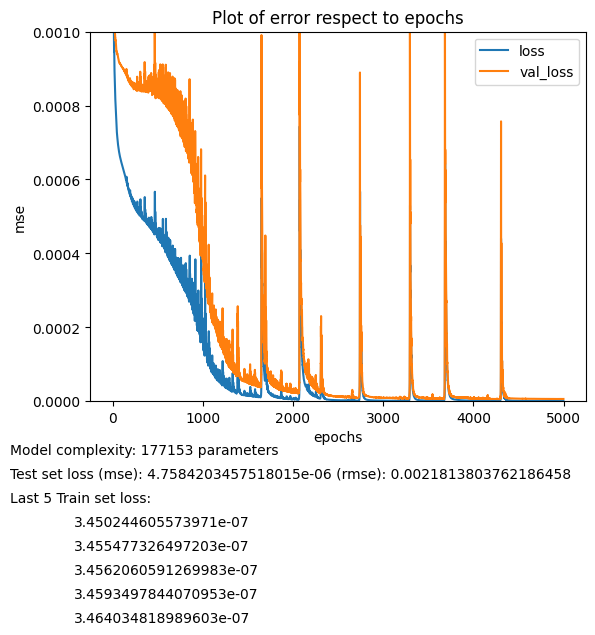

In [17]:
#plotting of training information
plt.plot(range(num_epochs),history.history['loss'])
plt.plot(range(num_epochs),history.history['val_loss'])
plt.legend(["loss","val_loss"])
plt.ylabel('mse')
plt.xlabel('epochs')
plt.title('Plot of error respect to epochs')
plt.ylim([0, 1e-3])
plt.figtext(0, 0, "Model complexity: "+str(model.count_params())+" parameters", fontsize=10)
plt.figtext(0, -0.05, "Test set loss (mse): "+str(test_eval)+" (rmse): "+str(math.sqrt(test_eval)), fontsize=10)
plt.figtext(0, -0.1, "Last 5 Train set loss:", fontsize=10)
plt.figtext(0.1, -0.15, str(history.history['loss'][-1]), fontsize=10)
plt.figtext(0.1, -0.2, str(history.history['loss'][-2]), fontsize=10)
plt.figtext(0.1, -0.25, str(history.history['loss'][-3]), fontsize=10)
plt.figtext(0.1, -0.3, str(history.history['loss'][-4]), fontsize=10)
plt.figtext(0.1, -0.35, str(history.history['loss'][-5]), fontsize=10)
plt.show()

# Empirical testing

In this part, model can be evaluated with empirical examples

In [18]:
#emp_test = np.array([-2.9219,3.009,4.4996,45])
#emp_test = np.reshape(emp_test,(1,4))
#emp_test = ss.transform(emp_test)

In [19]:
#model.predict(emp_test)

# Scatter plot

In [20]:
#Function that returns all the predictions of train set into a list
def predictions(X_test):
    pred = []

    for i in range(0,X_test.shape[0]):
        k = X_test[i]
        k = np.reshape(k,(1,4))
        #k = ss.transform(k)
        pred.append(float(model.predict(k))) 
    return pred

In [21]:
pred = predictions(X_test)

1/1 [==============================] - 0s 39ms/step


In [22]:
#mse test(to check if predictions are good)
mse = (y_test-pred)**2
np.sum(mse)/mse.shape[0]

4.7584203509164655e-06

In [23]:
for i in range(0,len(pred)):
    print(X_test[i],y_test[i],pred[i])

[ 0.67709406 -0.91282913 -0.71486357  0.22931361] 0.077489865 0.07494348287582397
[-0.27898811 -0.91294277  1.56190681  0.22931361] 0.016163291 0.01552911102771759
[-1.37019866  1.42105358 -0.71532262 -0.1762493 ] -0.017089023 -0.015400589443743229
[-1.09105635 -0.89055671  1.5616659   0.53348579] 0.01419101 0.01402802299708128
[-1.71038544 -0.93993499 -1.39870586 -0.07485857] -0.023257028 -0.02327526919543743
[-1.00889805  1.02191239 -0.7152279   1.44600235] -0.02832542 -0.027971439063549042
[-0.81626554  0.84093218  1.10645218 -0.37903076] 0.00878955 0.011307806707918644
[ 0.64233849 -0.55185648 -1.39796399  0.53348579] 0.133957845 0.13576851785182953
[ 0.99149619  0.95794563  1.10687435 -0.27764003] 0.000136873 7.459253538399935e-05
[ 0.95570495  1.03635586 -1.17018203  0.83765798] -0.020795486 -0.020051106810569763
[-1.23485907 -0.91291998  1.10620626  0.22931361] 0.014512921 0.015406097285449505
[-1.57690597 -0.97635586  1.10609787 -0.58181222] -0.005062134 -0.0060763671062886715


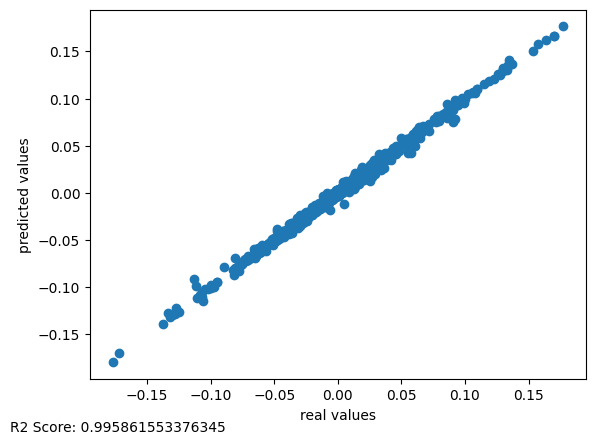

In [24]:
#scatter plot and r2 score
import sklearn
sklearn.metrics.r2_score(y_test,pred)

plt.scatter(y_test,pred)
plt.ylabel('predicted values')
plt.xlabel('real values')
plt.figtext(0, 0, "R2 Score: "+str(sklearn.metrics.r2_score(y_test,pred)), fontsize=10)
plt.show()

# Saving model

In [25]:
#model.save('CPL_meV.h5')